In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import math
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


In [2]:
df = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件1.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:D',  # 读取 A 到 D 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)

In [3]:
df1 = pd.read_excel(
    'C:/Users/海棠微雨/Desktop/C题/附件2.xlsx',
    sheet_name='Sheet1',
    header=0,  # 第一行作为列名
    usecols='A:G',  # 读取 A 到 D 列
    index_col=None,  # 第一列作为行索引
    skiprows=0,  # 不跳过
    nrows=None  # 读取所有 行
)

In [4]:
encoder = df['单品编码']
name = df['分类名称']
# 使用 zip() 函数将两个列表合并为一个字典
my_dict = dict(zip(encoder, name))

In [5]:
encoder1 = df1['单品编码']
sales_date = df1['销售日期']
Sales_status = df1['销售类型']
Sales_kg = df1['销量(千克)']
length = len(encoder1)

In [14]:
def creat_dict(j, List):
    Dict = {}
    seen = set()
    for i in List:
        Key = str(i)
        if Key[:j] not in seen:
            Dict[Key[:j]] = []  # 你可以把对应的值设置为任意值
            seen.add(Key[:j])
    return Dict

In [18]:
dict_sales = creat_dict(7, sales_date)
s = ['一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '十一', '十二']
dict1 = creat_dict(2, s)
date_sales = creat_dict(2, s)
for i in range(length):
    if Sales_status[i] == '销售':
        a = sales_date[i]
        dict_sales[str(sales_date[i])[:7]].append([my_dict[encoder1[i]], Sales_kg[i] ,1])
    elif Sales_status[i] == '退货':
        dict_sales[str(sales_date[i])[:7]].append([my_dict[encoder1[i]], Sales_kg[i] ,0])

In [23]:
Num = 0
sead = -1
count = 0
[A, B, C, D, E, F] = [[], [], [], [], [], []]
for i in dict_sales.keys():
    for j in dict_sales[i]:
        count += 1
        if j[0] == '花叶类':
            A.append(j[1])
        elif j[0] == '花菜类':
            B.append(j[1])
        elif j[0] == '辣椒类':
            C.append(j[1])
        elif j[0] == '茄类':
            D.append(j[1])
        elif j[0] == '食用菌':
            E.append(j[1])
        elif j[0] == '水生根茎类':
            F.append(j[1])
    Num += 1
    if Num == 3:
        sead += 1
        Num = 0
        dict1[s[sead]] = [math.fsum(A), math.fsum(B), math.fsum(C), math.fsum(D), math.fsum(E), math.fsum(F)]
        date_sales[s[sead]] = [(math.fsum(A))/90, (math.fsum(B))/90, (math.fsum(C))/90, (math.fsum(D))/90, (math.fsum(E))/90, (math.fsum(F))/90]
        count = 0
        [A, B, C, D, E, F] = [[], [], [], [], [], []]

A, B, C, D, E, F = '花叶类', '花菜类', '辣椒类', '茄类', '食用菌', '水生根茎类'

In [28]:
data_A, data_B, data_C, data_D, data_E, data_F = [], [], [], [], [], []
for i in date_sales.values():
    data_A.append(i[0])
    data_B.append(i[1])
    data_C.append(i[2])
    data_D.append(i[3])
    data_E.append(i[4])
    data_F.append(i[5])

In [40]:
# 创建插值函数
def creat_interp(x, y, x_smooth):
    y_smooth = make_interp_spline(x, y)(x_smooth)
    return y_smooth

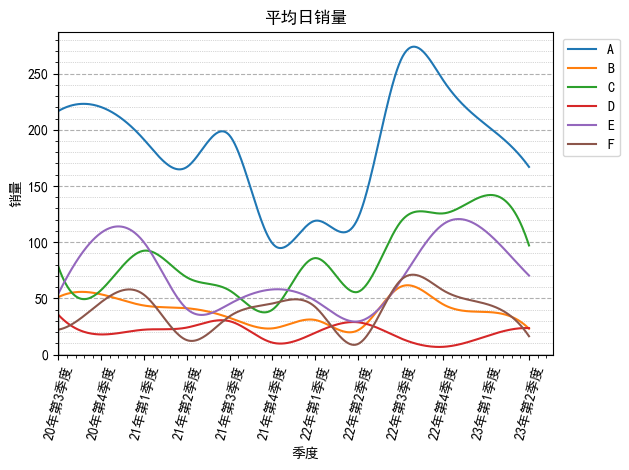

In [74]:
# 给定的 y 值
y_A, y_B, y_C, y_D, y_E, y_F = np.array(data_A), np.array(data_B), np.array(data_C), np.array(data_D), np.array(data_E), np.array(data_F)

# x 轴的自定义标签（文字）
x_labels = ['20年第3季度', '20年第4季度', '21年第1季度', '21年第2季度', '21年第3季度', '21年第4季度', '22年第1季度', '22年第2季度', '22年第3季度', '22年第4季度', '23年第1季度', '23年第2季度']
x = np.arange(len(x_labels))  # x 轴的索引值


# 生成更多的 x 值
x_smooth = np.linspace(0, len(x_labels)-1, 500)
A_smooth = creat_interp(x, y_A, x_smooth)
B_smooth = creat_interp(x, y_B, x_smooth)
C_smooth = creat_interp(x, y_C, x_smooth)
D_smooth = creat_interp(x, y_D, x_smooth)
E_smooth = creat_interp(x, y_E, x_smooth)
F_smooth = creat_interp(x, y_F, x_smooth)

# # 绘制曲线带图表
# plt.plot(x_smooth, A_smooth, label='A', linestyle='-', marker='o', markersize=0.5, linewidth=0.5)
# plt.plot(x_smooth, B_smooth, label='B', linestyle='--', marker='s', markersize=0.5, linewidth=0.5)
# plt.plot(x_smooth, C_smooth, label='C', linestyle='-.', marker='^', markersize=0.5, linewidth=0.5)
# plt.plot(x_smooth, D_smooth, label='D', linestyle=':', marker='d', markersize=0.5, linewidth=0.5)
# plt.plot(x_smooth, E_smooth, label='E', linestyle='-', marker='v', markersize=0.5, linewidth=0.5)
# plt.plot(x_smooth, F_smooth, label='F', linestyle='--', marker='x', markersize=0.5, linewidth=0.5)

# 绘制曲线
plt.plot(x_smooth, A_smooth, label='A')
plt.plot(x_smooth, B_smooth, label='B')
plt.plot(x_smooth, C_smooth, label='C')
plt.plot(x_smooth, D_smooth, label='D')
plt.plot(x_smooth, E_smooth, label='E')
plt.plot(x_smooth, F_smooth, label='F')

# 绘制 x=0 和 y=0 的轴线
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# 设置 x 轴和 y 轴的范围
plt.xlim(left=0)
plt.ylim(bottom=0)

# 设置 x 轴的标签为文字
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=75)
# plt.scatter(x, y_A, color='red')  # 标出原始点
plt.title("平均日销量")
plt.xlabel("季度")
plt.ylabel("销量")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # 调整图例位置

# 显示更密集的网格线
plt.grid(True, axis='y', which='both', linestyle='--')
plt.minorticks_on()  # 启用次要刻度线
plt.grid(True, axis='y', which='minor', linestyle=':', linewidth=0.5)  # 设置次要网格线样式

plt.tight_layout()  # 自动调整子图参数
plt.show()
